## Bonus Assignment Week 5

This week we are using numpy and matplotlib

In [1]:
# Start by loading the relevant libraries
import numpy as np

### Numpy: Magic Square

A <A HREF="https://en.wikipedia.org/wiki/Magic_square">magic square</A> is a matrix in which the sum of all rows, columns and diagonals are the same.
You can verify this fact for the matrix below by:
  * calculating an array containing the sums of all rows
  * calculate the minimum and maximum of this array
  * calculating an array containing the sum of all columns
  * calculate the minimum and maximum of this array
  * calculating the sum of both diagonals
  * check that both minimums and maximums and diagonals are the same value.

```python
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])
```
#### Assignment 5.1

Write a function **is_magic_square()** that takes a matrix as input and returns **True** if the matrix is a magic square and **False** otherwise. Use the matrix above to test your function.

*Hint*: Use np.diag and np.fliplr to get the diagonals of a matrix.


In [2]:
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])

def is_magic_square(X):
    
    a1=min(X.sum(axis = 0))
    a2=max(X.sum(axis = 0))
    a3=min(X.sum(axis = 1))
    a4=max(X.sum(axis = 1))
    a5=np.diag(X).sum()
    a6=np.diag(np.fliplr(X)).sum()
    
    if a1==a2==a3==a4==a5==a6:
        return True
    else:
        return False
    
        
is_magic_square(msquare)

True

### Generating Magic Squares

The above function can be used in a (crude) method to generate magic squares

#### Assignment 5.2

Write a function **generateMagicSquare()** that generates a 3x3 magic square (containing numbers 1...9). 

Use the following algorithm:

  * Use the function **is_magic_square()** from the previous question to check if a matrix is a valid magic square or not.
  * Generate random 3x3 squares filled with the exact numbers 1..9 in some order and check if that matrix is a magic square. If so, print the magic square.
  
  * You may need to generate 100,000 matrices to find one that is a magic square (by chance).
  
*Hint*: Use np.random.permutation to generate a random permutation of an array.

In [3]:
def generateMagicSquare():
    for i in range(100000):
        a = np.random.permutation(np.arange(1,10)).reshape((3,3))
        if is_magic_square(a):
            print(a)
            break
        
generateMagicSquare()

[[8 3 4]
 [1 5 9]
 [6 7 2]]


### More grading

This question continues from the exercise made in class (see file 'Week5_class_part1_numpy.ipynb'). We quickly recreate the dataset here, see the aforementioned files for details.



In [4]:
# create students and grades arrays, using random grades
students = np.array(['Anne', 'Bob', 'Mary', 'John', 'Julia', 'Mike', 'Susan', 'Zach'])
grades = np.random.rand( 8,20 )* 6 + 4

# create an array with the average grades per student 
avg_grades = grades.mean(axis=1)

# create a masked array where we mask away all grades below 5.8
masked_grades = np.ma.masked_array( grades, grades < 5.8 )

# calculate the averages per student
avg_grades = masked_grades.mean( axis = 1 ) 

# print the array to see what we have
print(avg_grades)

[7.78052274196028 7.626971690696596 7.6804664619422365 7.967539048838483
 7.666909333248285 8.011163106702446 7.983003442897682 8.303631617277786]


#### Assignment 5.3

Using the above data, do the following:

  1. Plot the avarage grade per student in a bar chart, set the axis and labels accordingly.
  2. Plot the average grades for each of the 20 assignments.
  3. Try to fit a line to this line and try to predict the average grades for the next assignment. Plot the result.
     
     *Hint* Use np.polyfit() to find a fitting function. Use np.polyval() to evaluate a polynomial. How does the degree of the polynomial effect the fitting?

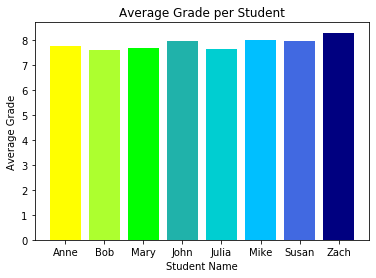

In [8]:
import matplotlib.pyplot as plt

colors=['YELLOW','GREENYELLOW','LIME', 'LIGHTSEAGREEN', 'DARKTURQUOISE','DEEPSKYBLUE','ROYALBLUE','NAVY']
x_pos = [i for i, p in enumerate(students)]
plt.bar(x_pos, avg_grades, color=colors)
plt.xlabel("Student Name")
plt.ylabel("Average Grade")
plt.title("Average Grade per Student")
plt.xticks(x_pos, students)

plt.show()

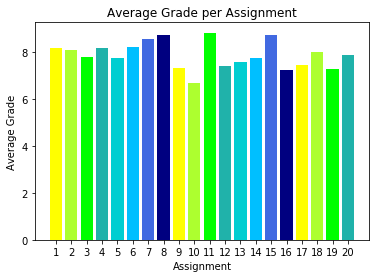

In [6]:
avg_assignment_grades = masked_grades.mean( axis = 0 )

colors=['YELLOW','GREENYELLOW','LIME', 'LIGHTSEAGREEN', 'DARKTURQUOISE','DEEPSKYBLUE','ROYALBLUE','NAVY']
x_pos = [i+1 for i, p in enumerate(avg_assignment_grades)]
plt.bar(x_pos, avg_assignment_grades,color=colors)
plt.xlabel("Assignment")
plt.ylabel("Average Grade")
plt.title("Average Grade per Assignment")
plt.xticks(x_pos)

plt.show()

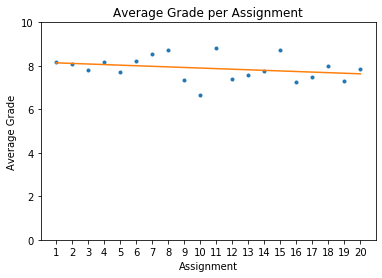

Predicted average grade of assignment #21 is: 7.606610841717395


In [7]:
z = np.polyfit(x_pos, avg_assignment_grades, 1)
#The higher the degree of polynomial, the better fit the line
p = np.poly1d(z)

xp = np.linspace(1, 20, 20)

plt.plot(x_pos, avg_assignment_grades, '.', xp, p(xp), '-')

plt.xlabel("Assignment")
plt.ylabel("Average Grade")
plt.title("Average Grade per Assignment")
plt.xticks(x_pos)
plt.ylim(0,10)

plt.show()

print("Predicted average grade of assignment #21 is:", np.polyval(z,21))